In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('transaction.csv')

In [3]:
df.columns.tolist()

['step',
 'type',
 'amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

In [4]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [5]:
print(df.isnull().sum().sort_values(ascending=False)) 

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [6]:
for c1, c2 in df.dtypes.reset_index().values:
    if c2=='O':
        print(df[c1].value_counts())
        print(f'\n > **Total Null Values:** {df[c1].isnull().sum()}')
        print(f'\n > **Total Unique Values:** {len(df[c1].unique())}')
        print('-' * 20 + '\n')

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

 > **Total Null Values:** 0

 > **Total Unique Values:** 5
--------------------

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64

 > **Total Null Values:** 0

 > **Total Unique Values:** 6353307
--------------------

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64

 > **Total Null Values:** 0

 > **Total Unique Values:** 2722362
--------------------



In [7]:
# One-Hot Encode 'type'
type_dummies = pd.get_dummies(df['type'], prefix='type')
df = pd.concat([df, type_dummies], axis=1)
df.drop('type', axis=1, inplace=True)


In [8]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,False,False,False,True,False
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False,False,False,True,False
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,False,False,False,True
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,False,True,False,False,False
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,False,False,False,True,False


In [9]:
# Frequency Encoding for 'nameOrig'
freq_encoding_orig = df['nameOrig'].value_counts() / len(df)
df['nameOrig_freq'] = df['nameOrig'].map(freq_encoding_orig)

# Frequency Encoding for 'nameDest'
freq_encoding_dest = df['nameDest'].value_counts() / len(df)
df['nameDest_freq'] = df['nameDest'].map(freq_encoding_dest)

# Drop original columns
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)


In [10]:
from sklearn.preprocessing import StandardScaler

# Identify numerical features
numerical_features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [11]:
# Balance differences for Origin
df['balance_diff_orig'] = df['oldbalanceOrg'] - df['newbalanceOrig']

# Balance differences for Destination
df['balance_diff_dest'] = df['oldbalanceDest'] - df['newbalanceDest']

# Optionally, drop original balance features if differences are more informative
df.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], axis=1, inplace=True)


In [12]:
# 4. Feature Engineering: Time-Based Features
# Define constants
MINUTES_IN_HOUR = 60
MINUTES_IN_DAY = 24 * MINUTES_IN_HOUR

# Calculate minute within the day
df['minute_of_day'] = df['step'] % MINUTES_IN_DAY

# Extract hour and minute
df['hour'] = (df['minute_of_day'] // MINUTES_IN_HOUR).astype(int)
df['minute'] = (df['minute_of_day'] % MINUTES_IN_HOUR).astype(int)

# Create cyclical features
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['minute_sin'] = np.sin(2 * np.pi * df['minute'] / 60)
df['minute_cos'] = np.cos(2 * np.pi * df['minute'] / 60)

# (Optional) Extract day features if applicable
DAYS_IN_WEEK = 7
df['day'] = (df['step'] // MINUTES_IN_DAY).astype(int)
df['day_of_week'] = df['day'] % DAYS_IN_WEEK
df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / DAYS_IN_WEEK)
df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / DAYS_IN_WEEK)

# Drop intermediate time-related columns
df.drop(['minute_of_day', 'hour', 'minute', 'day', 'day_of_week'], axis=1, inplace=True, errors='ignore')

In [13]:
df

,step,amount,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameOrig_freq,nameDest_freq,balance_diff_orig,balance_diff_dest,hour_sin,hour_cos,minute_sin,minute_cos,day_of_week_sin,day_of_week_cos
0,-1.703042,-0.281560,0,0,False,False,False,True,False,1.571680e-07,1.571680e-07,0.007812,0.009598,-0.258819,0.965926,-0.207912,0.978148,-0.781831,0.62349
1,-1.703042,-0.294767,0,0,False,False,False,True,False,1.571680e-07,1.571680e-07,0.004453,0.009598,-0.258819,0.965926,-0.207912,0.978148,-0.781831,0.62349
2,-1.703042,-0.297555,1,0,False,False,False,False,True,1.571680e-07,6.915390e-06,0.003788,0.009598,-0.258819,0.965926,-0.207912,0.978148,-0.781831,0.62349
3,-1.703042,-0.297555,1,0,False,True,False,False,False,1.571680e-07,6.443886e-06,0.003788,0.015829,-0.258819,0.965926,-0.207912,0.978148,-0.781831,0.62349
4,-1.703042,-0.278532,0,0,False,False,False,True,False,1.571680e-07,1.571680e-07,0.007892,0.009598,-0.258819,0.965926,-0.207912,0.978148,-0.781831,0.62349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,3.510123,0.264665,1,0,False,True,False,False,False,1.571680e-07,3.143359e-07,0.121334,-0.082855,0.000000,1.000000,0.309017,0.951057,0.000000,1.00000
6362616,3.510123,10.153953,1,0,False,False,False,False,True,1.571680e-07,1.571680e-07,2.188933,0.009598,0.000000,1.000000,0.309017,0.951057,0.000000,1.00000
6362617,3.510123,10.153953,1,0,False,True,False,False,False,1.571680e-07,4.715039e-07,2.188933,-1.706692,0.000000,1.000000,0.309017,0.951057,0.000000,1.00000
6362618,3.510123,1.109765,1,0,False,False,False,False,True,1.571680e-07,1.571680e-07,0.298023,0.009598,0.000000,1.000000,0.309017,0.951057,0.000000,1.00000


In [14]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df.drop('isFraud', axis=1)
y = df['isFraud']

# 8. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Data split into training and testing sets.")

# 9. Handle class imbalance with SMOTE (only on training data)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

Data split into training and testing sets.


In [15]:
X_train_res

,step,amount,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameOrig_freq,nameDest_freq,balance_diff_orig,balance_diff_dest,hour_sin,hour_cos,minute_sin,minute_cos,day_of_week_sin,day_of_week_cos
0,-1.604680,-0.281436,0,False,False,False,True,False,1.571680e-07,1.571680e-07,0.007304,0.009598,-0.258819,0.965926,-0.207912,0.978148,-0.781831,0.62349
1,-1.569551,-0.286503,0,False,False,False,True,False,1.571680e-07,1.571680e-07,0.003725,0.009598,-0.258819,0.965926,-0.207912,0.978148,-0.781831,0.62349
2,-0.087101,0.300319,0,False,True,False,False,False,1.571680e-07,2.514687e-06,0.003725,-0.077933,-0.258819,0.965926,-0.104528,0.994522,-0.781831,0.62349
3,-0.051972,-0.286124,0,False,False,False,True,False,1.571680e-07,1.571680e-07,0.003725,0.009598,-0.258819,0.965926,-0.104528,0.994522,-0.781831,0.62349
4,-0.705374,0.063190,0,True,False,False,False,False,1.571680e-07,4.715039e-06,-0.015526,0.122612,-0.258819,0.965926,-0.104528,0.994522,-0.781831,0.62349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10167047,2.317499,-0.202221,0,False,True,False,False,False,1.571680e-07,9.430078e-07,0.023720,-0.005211,0.000000,1.000000,0.207912,0.978148,0.000000,1.00000
10167048,-0.965950,0.014945,0,False,False,False,False,True,1.571680e-07,1.317409e-06,0.069124,0.009598,-0.258819,0.965926,-0.104528,0.994522,-0.781831,0.62349
10167049,0.835546,-0.198994,0,False,False,False,False,True,1.571680e-07,1.571680e-07,0.024395,0.009598,0.000000,1.000000,0.000000,1.000000,0.000000,1.00000
10167050,0.155567,-0.259957,0,False,True,False,False,False,1.571680e-07,1.036015e-06,0.011649,0.003715,0.000000,1.000000,0.000000,1.000000,0.000000,1.00000


In [16]:
from imblearn.under_sampling import RandomUnderSampler

# After SMOTE, perform random undersampling
rus = RandomUnderSampler(sampling_strategy=1.0, random_state=42)  # Set desired ratio here
X_resampled, y_resampled = rus.fit_resample(X_train_res, y_train_res)
X_resampled

,step,amount,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameOrig_freq,nameDest_freq,balance_diff_orig,balance_diff_dest,hour_sin,hour_cos,minute_sin,minute_cos,day_of_week_sin,day_of_week_cos
0,-1.604680,-0.281436,0,False,False,False,True,False,1.571680e-07,1.571680e-07,0.007304,0.009598,-0.258819,0.965926,-0.207912,0.978148,-0.781831,0.62349
1,-1.569551,-0.286503,0,False,False,False,True,False,1.571680e-07,1.571680e-07,0.003725,0.009598,-0.258819,0.965926,-0.207912,0.978148,-0.781831,0.62349
2,-0.087101,0.300319,0,False,True,False,False,False,1.571680e-07,2.514687e-06,0.003725,-0.077933,-0.258819,0.965926,-0.104528,0.994522,-0.781831,0.62349
3,-0.051972,-0.286124,0,False,False,False,True,False,1.571680e-07,1.571680e-07,0.003725,0.009598,-0.258819,0.965926,-0.104528,0.994522,-0.781831,0.62349
4,-0.705374,0.063190,0,True,False,False,False,False,1.571680e-07,4.715039e-06,-0.015526,0.122612,-0.258819,0.965926,-0.104528,0.994522,-0.781831,0.62349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6653532,2.408697,1.803004,0,False,False,False,False,True,1.571680e-07,1.571680e-07,0.442961,0.009598,0.000000,1.000000,0.207912,0.978148,0.000000,1.00000
7318015,-1.330806,-0.042215,0,False,True,False,False,False,1.571680e-07,2.653925e-06,0.057173,-0.025260,-0.258819,0.965926,-0.207912,0.978148,-0.781831,0.62349
10010010,1.715153,1.692137,0,False,False,False,False,True,1.571680e-07,1.571680e-07,0.419782,0.009598,0.000000,1.000000,0.104528,0.994522,0.000000,1.00000
9388098,1.108865,3.274995,0,False,False,False,False,True,1.571680e-07,1.571680e-07,0.750717,0.009598,0.000000,1.000000,0.104528,0.994522,0.000000,1.00000


In [17]:
import pandas as pd

# Assuming X_resampled and y_resampled are the features and target arrays
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Downsample to 200,000 rows
data_resampled_downsampled = data_resampled.sample(n=200000, random_state=42)
X_final = data_resampled_downsampled.drop('isFraud', axis=1)  # Replace 'target_column' with actual target column name
y_final = data_resampled_downsampled['isFraud']

In [18]:
X_final

,step,amount,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameOrig_freq,nameDest_freq,balance_diff_orig,balance_diff_dest,hour_sin,hour_cos,minute_sin,minute_cos,day_of_week_sin,day_of_week_cos
6312008,-1.034736,11.223142,0,False,False,False,False,True,1.571680e-07,2.955290e-06,2.412473,0.009598,-0.258819,0.965926,-0.182391,0.982190,-0.781831,0.62349
631354,1.072161,0.132009,0,False,True,False,False,False,1.571680e-07,4.715039e-07,0.021267,-0.060650,0.000000,1.000000,0.104528,0.994522,0.000000,1.00000
5075399,2.133061,0.268400,0,False,True,False,False,False,1.571680e-07,2.986191e-06,0.003809,0.006049,0.000000,1.000000,0.207912,0.978148,0.000000,1.00000
1028128,0.109622,0.027538,0,False,True,False,False,False,1.571680e-07,9.430078e-07,0.011512,-0.043882,0.000000,1.000000,0.000000,1.000000,0.000000,1.00000
9096632,0.233756,16.262325,0,False,True,False,False,False,1.571680e-07,1.736605e-06,3.466038,-2.710163,0.000000,1.000000,0.000000,1.000000,0.000000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6895619,-1.041044,2.103321,0,False,True,False,False,False,1.571680e-07,2.629925e-06,0.505750,-0.377774,-0.258819,0.965926,-0.197371,0.979817,-0.781831,0.62349
9535631,-1.042614,-0.208782,0,False,False,False,False,True,1.571680e-07,8.786452e-07,0.022348,0.009598,-0.258819,0.965926,-0.207912,0.978148,-0.781831,0.62349
9639230,-0.448302,0.000894,0,False,False,False,False,True,1.571680e-07,6.204871e-07,0.066186,0.009598,-0.258819,0.965926,-0.104528,0.994522,-0.781831,0.62349
1840187,-0.571883,-0.060754,0,True,False,False,False,False,1.571680e-07,2.986191e-06,0.032496,0.103395,-0.258819,0.965926,-0.104528,0.994522,-0.781831,0.62349


C:\Users\Mohnish\AppData\Local\Temp\ipykernel_29792\1488458902.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_final, palette='viridis')


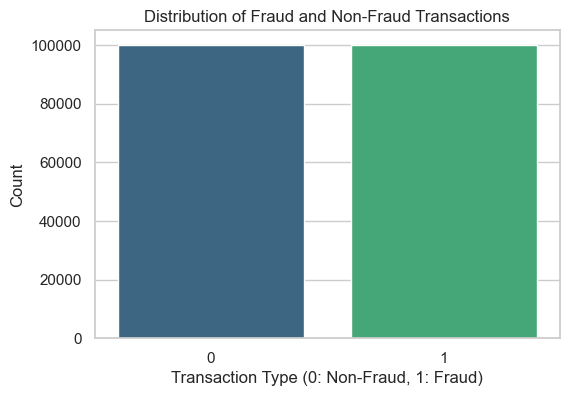

,step,amount,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameOrig_freq,nameDest_freq,balance_diff_orig,balance_diff_dest,hour_sin,hour_cos,minute_sin,minute_cos,day_of_week_sin,day_of_week_cos
6312008,-1.034736,11.223142,0,False,False,False,False,True,1.571680e-07,2.955290e-06,2.412473,0.009598,-0.258819,0.965926,-0.182391,0.982190,-0.781831,0.62349
631354,1.072161,0.132009,0,False,True,False,False,False,1.571680e-07,4.715039e-07,0.021267,-0.060650,0.000000,1.000000,0.104528,0.994522,0.000000,1.00000
5075399,2.133061,0.268400,0,False,True,False,False,False,1.571680e-07,2.986191e-06,0.003809,0.006049,0.000000,1.000000,0.207912,0.978148,0.000000,1.00000
1028128,0.109622,0.027538,0,False,True,False,False,False,1.571680e-07,9.430078e-07,0.011512,-0.043882,0.000000,1.000000,0.000000,1.000000,0.000000,1.00000
9096632,0.233756,16.262325,0,False,True,False,False,False,1.571680e-07,1.736605e-06,3.466038,-2.710163,0.000000,1.000000,0.000000,1.000000,0.000000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6895619,-1.041044,2.103321,0,False,True,False,False,False,1.571680e-07,2.629925e-06,0.505750,-0.377774,-0.258819,0.965926,-0.197371,0.979817,-0.781831,0.62349
9535631,-1.042614,-0.208782,0,False,False,False,False,True,1.571680e-07,8.786452e-07,0.022348,0.009598,-0.258819,0.965926,-0.207912,0.978148,-0.781831,0.62349
9639230,-0.448302,0.000894,0,False,False,False,False,True,1.571680e-07,6.204871e-07,0.066186,0.009598,-0.258819,0.965926,-0.104528,0.994522,-0.781831,0.62349
1840187,-0.571883,-0.060754,0,True,False,False,False,False,1.571680e-07,2.986191e-06,0.032496,0.103395,-0.258819,0.965926,-0.104528,0.994522,-0.781831,0.62349


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for the plot
sns.set(style='whitegrid')
# Create a bar plot for the target variable 'isFraud'
plt.figure(figsize=(6, 4))
sns.countplot(x=y_final, palette='viridis')

# Add title and labels
plt.title('Distribution of Fraud and Non-Fraud Transactions')
plt.xlabel('Transaction Type (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')

# Show plot
plt.show()
X_final

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from lazypredict.Supervised import LazyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Assuming you have your data split into X and y
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your selected models
selected_models = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'XGBClassifier': XGBClassifier(eval_metric='logloss'),  # Set eval_metric to avoid warning
    'LightGBMClassifier': LGBMClassifier(),
    'CatBoostClassifier': CatBoostClassifier(silent=True)  # Set silent=True to suppress warnings
}

# Store results
results = []

# Train and evaluate each selected model
for model_name, model in selected_models.items():
    # Fit the model
    model.fit(X_final, y_final)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Append results
    results.append({'Model': model_name, 'ROC AUC': roc_auc})

# Convert results to DataFrame for better visualization
import pandas as pd

results_df = pd.DataFrame(results)

# Display results sorted by ROC AUC
print(results_df.sort_values(by='ROC AUC', ascending=False))


[LightGBM] [Info] Number of positive: 99918, number of negative: 100082
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1986
[LightGBM] [Info] Number of data points in the train set: 200000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499590 -> initscore=-0.001640
[LightGBM] [Info] Start training from score -0.001640
                    Model  ROC AUC
1  RandomForestClassifier     0.97
2           XGBClassifier     0.96
3      LightGBMClassifier     0.96
0    KNeighborsClassifier     0.95
4      CatBoostClassifier     0.94


In [29]:
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
clf = GridSearchCV(estimator=rf_classifier, 
                               param_grid=rf_param_grid, 
                               scoring='roc_auc', 
                               cv=5, 
                               verbose=1, 
                               n_jobs=-1)
clf.fit(X_final, y_final)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='roc_auc', verbose=1)

In [30]:
print("Best parameters for RandomForestClassifier:", clf.best_params_)
print("Best ROC AUC score for RandomForestClassifier:", clf.best_score_)

Best parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best ROC AUC score for RandomForestClassifier: 0.999418691858296


In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ypred,y_test))

0.9896984261200574


In [32]:
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [5, 7, 10],
    'subsample': [0.8, 0.9, 1.0],
}

xgb_grid_search = GridSearchCV(estimator=xgb_classifier, 
                                param_grid=xgb_param_grid, 
                                scoring='roc_auc', 
                                cv=5, 
                                verbose=1, 
                                n_jobs=-1)

xgb_grid_search.fit(X_final, y_final)

# Best parameters and score for XGBClassifier
print("Best parameters for XGBClassifier:", xgb_grid_search.best_params_)
print("Best ROC AUC score for XGBClassifier:", xgb_grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for XGBClassifier: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.9}
Best ROC AUC score for XGBClassifier: 0.9997636023405116


In [34]:
from sklearn.ensemble import RandomForestClassifier

# Best parameters from the grid search
best_params_rf = {
    'max_depth': None, 
    'min_samples_leaf': 1, 
    'min_samples_split': 2, 
    'n_estimators': 200
}

# Initialize the RandomForestClassifier with the best parameters
rf_model = RandomForestClassifier(
    max_depth=best_params_rf['max_depth'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    min_samples_split=best_params_rf['min_samples_split'],
    n_estimators=best_params_rf['n_estimators'],
    random_state=42  # Set a random state for reproducibility
)

# Train the model with your training data
rf_model.fit(X_final, y_final)

# Optionally, make predictions and evaluate the model
y_pred = rf_model.predict(X_test)

# If you want to calculate the ROC AUC score for the test set
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

print(f"ROC AUC score for RandomForestClassifier on test set: {roc_auc}")


ROC AUC score for RandomForestClassifier on test set: 0.9966923257351724


In [35]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# Best parameters from the grid search
best_params_xgb = {
    'learning_rate': 0.1, 
    'max_depth': 10, 
    'n_estimators': 200, 
    'subsample': 0.9
}

# Initialize the XGBClassifier with the best parameters
xgb_model = XGBClassifier(
    learning_rate=best_params_xgb['learning_rate'],
    max_depth=best_params_xgb['max_depth'],
    n_estimators=best_params_xgb['n_estimators'],
    subsample=best_params_xgb['subsample'],
    use_label_encoder=False,   # Disable label encoding if you're using newer XGBoost versions
    random_state=42  # Set a random state for reproducibility
)

# Train the model with your training data
xgb_model.fit(X_final, y_final)

# Optionally, make predictions and evaluate the model
y_pred = xgb_model.predict(X_test)

# Calculate the ROC AUC score for the test set
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

print(f"ROC AUC score for XGBClassifier on test set: {roc_auc}")


ROC AUC score for XGBClassifier on test set: 0.9973489132626527


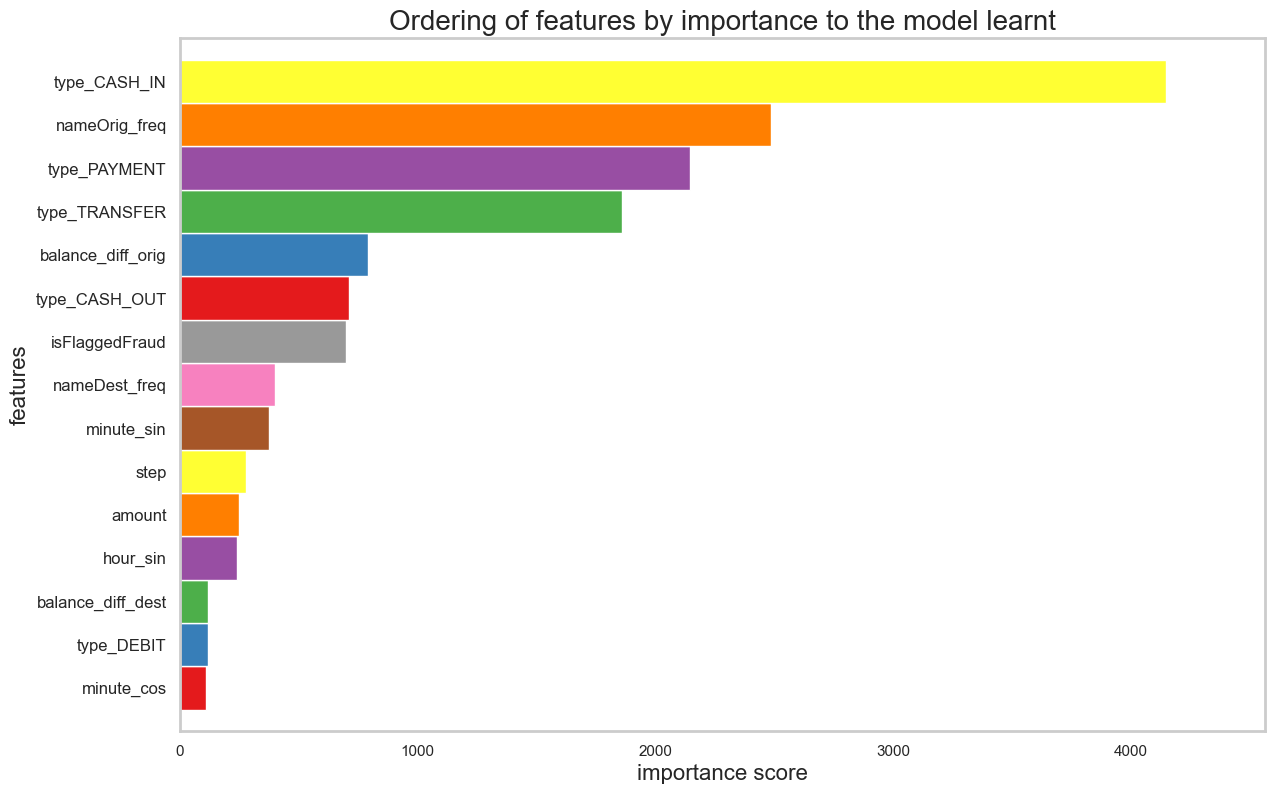

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
from xgboost import plot_importance

fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(xgb_model, height = 1, color = colours, grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        
ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);